# A tutorial to perform a cosmological analysis with BORG

This tutorial is now available in the main ARES-HADES-BORG documentation in [Read the Docs](https://aquila-ares.readthedocs.io/en/latest/user/running.html#running-borg-a-tutorial-to-perform-a-cosmological-analysis).

## Downloading and Installing BORG

This note provides a step by step instruction for downloading and installing the BORG software package. This step-by-step instruction has been done using a MacBook Air running OS X El Capitan. I encourage readers to modify this description as may be required to install BORG on a different OS. Please indicate all necessary modifications and which OS was used.

### Some Prerequisites
cmake≥ 3.10
automake
libtool
pkg-config
gcc ≥ 7 , or intel compiler (≥ 2018), or Clang (≥ 7)
wget (to download dependencies; the flag --use-predownload can be used to bypass this dependency if you already have downloaded the required files in the `downloads` directory)

### Clone the repository from BitBucket
To clone the ARES repository execute the following git command in a console: 
```
git clone --recursive git@bitbucket.org:bayesian_lss_team/ares.git
```

After the clone is successful, you shall change directory to `ares`, and execute:
```
bash get-aquila-modules.sh --clone
```

Ensure that correct branches are setup for the submodules using:
```
bash get-aquila-modules.sh --branch-set
```

If you want to check the status of the currently checked out ARES and its modules, please run:
```
bash get-aquila-modules.sh --status
```
You should see the following output:
```
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
This script can be run only by Aquila members.
if your bitbucket login is not accredited the next operations will fail.
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Checking GIT status...

Root tree	 (branch master) : good. All clear.  
Module ares_fg	(branch master) : good. All clear.  
Module borg	(branch master) : good. All clear.  
Module dm_sheet (branch master) : good. All clear.  
Module hades	(branch master) : good. All clear.  
Module hmclet	(branch master) : good. All clear.  
Module python	(branch master) : good. All clear.  
```

### Building BORG

To save time and bandwidth it is advised to pre-download the dependencies that will be used as part of the building procedure. You can do that with
```
bash build.sh --download-deps
```

That will download a number of tar.gz which are put in the `downloads/` folder.

Then you can configure the build itself:
```
bash build.sh --cmake CMAKE_BINARY --c-compiler YOUR_PREFERRED_C_COMPILER --cxx-compiler YOUR_PREFERRED_CXX_COMPILER --use-predownload
```
E.g. (This probably needs to be adjusted for your computer.):
```
bash build.sh --cmake /usr/local/Cellar/cmake/3.15.5/bin/cmake --c-compiler /usr/local/bin/gcc-9 --cxx-compiler /usr/local/bin/g++-9 --use-predownload
```



Once the configure is successful you should see a final output similar to this:
```
------------------------------------------------------------------

Configuration done.
Move to /Volumes/EXTERN/software/borg_fresh/ares/build and type 'make' now.
Please check the configuration of your MPI C compiler. You may need
to set an environment variable to use the proper compiler.

Some example (for SH/BASH shells):
- OpenMPI:
    OMPI_CC=/usr/local/bin/gcc-9
    OMPI_CXX=/usr/local/bin/g++-9
    export OMPI_CC OMPI_CXX

------------------------------------------------------------------
```

It tells you to move to the default build directory using `cd build`, after what you can type `make`. To speed up the compilation you can use more computing power by adding a `-j` option. For example
```
make -j4
```
will start 4 compilations at once (thus keep 4 cores busy all the time typically). Note, that the compilation can take some time.

# Running a test example

The ARES repository comes with some standard examples for LSS analysis. Here we will use a simple standard unit example for BORG. From your ARES base directory change to the examples folder:
```
cd examples
```
To start a BORG run just execute the following code in the console:
```
../build/src/hades3 INIT borg_unit_example.ini
```
BORG will now execute a simple MCMC. You can interupt calculation at any time. To resume the run you can just type:
```
../build/src/hades3 RESUME borg_unit_example.ini
```
You need at least on the order of 1000 samples to pass the initial warm-up phase of the sampler. As the execution of the code will consume about 2GB of your storage, we suggest to execute BORG in a directory with sufficient free hard disk storage.

# Analysing results
Now we will look at the out puts generated by the BORG run. Note, that you do not have to wait for the run to complete, but you can already investigate intermediate results while BORG still runs. BORG results are stored in two major HDF5 files, the restart and the mcmc files. The restart files contain all information on the state of the Markov Chain required to resume the Markov Chain if it has been interrupted. The restart file also contains static information, that will not change during the run, such as the data, selection functions and masks and other settings. The mcmc files contain the current state of the Markov Chain. They are indexed by the current step in the chain, and contain the current sampled values of density fields, power-spectra, galaxy bias and cosmological parameters etc.

# Opening files

## The required python preamble

In [1]:
import numpy as np
import h5py as h5
import matplotlib.pyplot as plt
import ares_tools as at
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

Skipping VTK tools


Now please indicate the path where you stored your BORG run:

In [2]:
fdir='../testbed/'

# Investigating the restart file

The restart file can be opened by

In [7]:
hf=h5.File(fdir+'restart.h5_0')

The content of the file can be investigated by listing the keys of the 'scalar' section

In [8]:
list(hf['scalars'].keys())

['ARES_version',
 'BORG_final_density',
 'BORG_version',
 'BORG_vobs',
 'K_MAX',
 'K_MIN',
 'L0',
 'L1',
 'L2',
 'MCMC_STEP',
 'N0',
 'N1',
 'N2',
 'N2_HC',
 'N2real',
 'NCAT',
 'NFOREGROUNDS',
 'NUM_MODES',
 'Ndata0',
 'Ndata1',
 'Ndata2',
 'adjust_mode_multiplier',
 'ares_heat',
 'bias_sampler_blocked',
 'borg_a_final',
 'borg_a_initial',
 'catalog_foreground_coefficient_0',
 'catalog_foreground_maps_0',
 'corner0',
 'corner1',
 'corner2',
 'cosmology',
 'forcesampling',
 'fourierLocalSize',
 'fourierLocalSize1',
 'galaxy_bias_0',
 'galaxy_bias_ref_0',
 'galaxy_data_0',
 'galaxy_nmean_0',
 'galaxy_sel_window_0',
 'galaxy_selection_info_0',
 'galaxy_selection_type_0',
 'galaxy_synthetic_sel_window_0',
 'gravity.do_rsd',
 'growth_factor',
 'hades_accept_count',
 'hades_attempt_count',
 'hades_mass',
 'hades_sampler_blocked',
 'hmc_Elh',
 'hmc_Eprior',
 'hmc_bad_sample',
 'hmc_force_save_final',
 'k_keys',
 'k_modes',
 'k_nmodes',
 'key_counts',
 'lightcone',
 'localN0',
 'localN1',
 'l

For example the input galaxy data can be viewed by: 

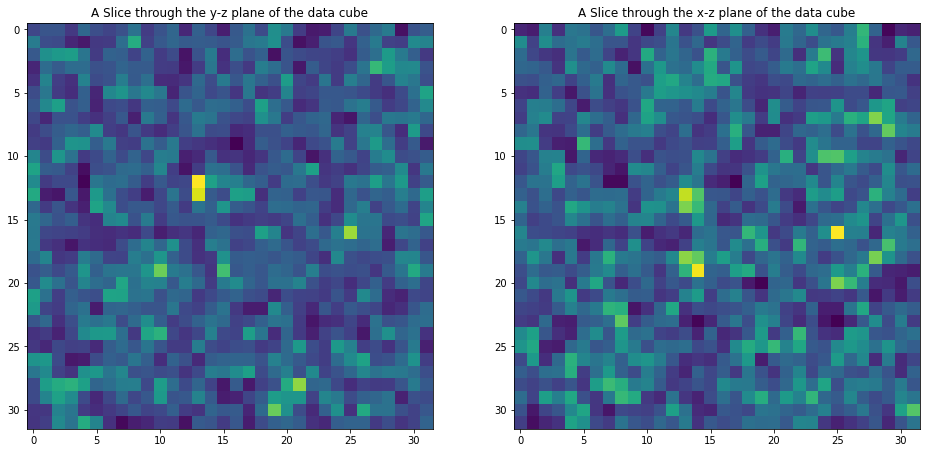

In [9]:
data=np.array(hf['scalars/galaxy_data_0'])

#Plot data
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16, 8))
ax1.set_title('A Slice through the y-z plane of the data cube')
im1=ax1.imshow(data[16,:,:])

ax2.set_title('A Slice through the x-z plane of the data cube')
im2=ax2.imshow(data[:,16,:])

plt.show()

# Investigating MCMC files

MCMC files are indexed by the sample number $i_{samp}$. Each file can be opened separately. Suppose we want to open the $10$th mcmc file, then:

In [16]:
isamp=10 # sample number
fname_mcmc=fdir+"mcmc_"+str(isamp)+".h5"
hf=h5.File(fname_mcmc)

## Inspect the content of the mcmc files

In [17]:
list(hf['scalars'].keys())

['BORG_final_density',
 'BORG_vobs',
 'catalog_foreground_coefficient_0',
 'cosmology',
 'galaxy_bias_0',
 'galaxy_nmean_0',
 'hades_accept_count',
 'hades_attempt_count',
 'hmc_Elh',
 'hmc_Eprior',
 'powerspectrum',
 's_field',
 's_hat_field']

## Plotting density fields

We can for instance be interested in plotting inferred initial and final density samples.

In [18]:
delta_in=np.array(hf['scalars/s_field'])
delta_fi=np.array(hf['scalars/BORG_final_density'])

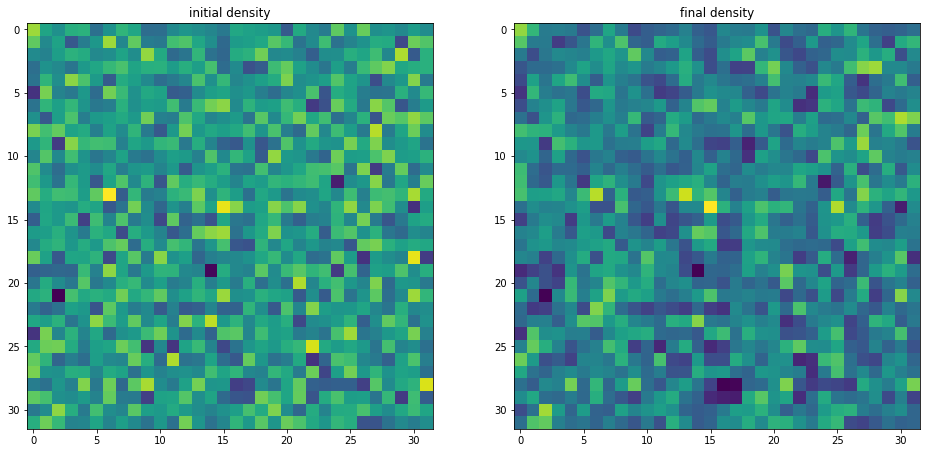

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16, 8))
ax1.set_title('initial density')
im1=ax1.imshow(delta_in[16,:,:])

ax2.set_title('final density')
im2=ax2.imshow(delta_fi[16,:,:])

plt.show()

## Plotting the power-spectrum

The ARES repository provides some routines to analyse the BORG runs. A particularly useful routine calculates the posterior power-spectra of inferred initial density fields.

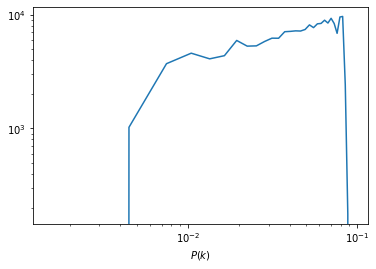

In [22]:
ss = at.analysis(fdir)  

#Nbin is the number of modes used for the power-spectrum binning
opts=dict(Nbins=32,range=(0,ss.kmodes.max()))

#You can choose the sample numper
isamp=10
P=ss.compute_power_shat_spectrum(isamp, **opts)

kmode = 0.5*(P[2][1:]+P[2][:-1])
P_k   = P[0]

plt.loglog(kmode,P_k)
plt.xlabel('k [h/Mpc]')
plt.xlabel(r'$P(k)$')
plt.show()

# Monitoring power-spectrum warm-up phase

Rather than looking just at individual posterior sample power-spectra we can follow the evolution of power-spectra across the chain. Suppose you want to monitor the first 100 samples.

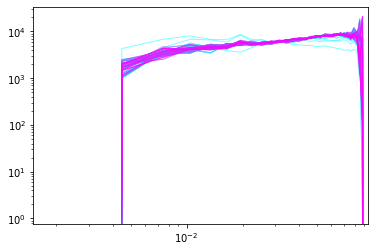

In [26]:
Nsamp=100
PPs=[]
for isamp in np.arange(Nsamp):
    PPs.append(ss.compute_power_shat_spectrum(isamp, **opts))


#plot power-spectra    
color_idx = np.linspace(0, 1, Nsamp)
idx=0
for PP in PPs:
    plt.loglog(kmode,PP[0],alpha=0.5,color=plt.cm.cool(color_idx[idx]), lw=1)
    idx=idx+1
plt.xlim([min(kmode),max(kmode)])
plt.show()